The commented out part of the code is where the program makes a ton of calls to imdb servers, in order to save time all results have been exported to files pd_movieId_plotline.csv and pd_movieId_director.csv.


Those files have been provided in the zipped folder and can be loaded manually. This keep the computation time managable. Please let us know if  any assistance with the given code base is required.

Thank you.

In [1]:
#important packages and libraries
import pandas as pd
import math
from decimal import Decimal
import operator
import numpy as np


In [3]:
from google.colab import files
uploaded = files.upload()
# please upload links.csv, movies.csv, ratings.csv and tags.csv


Saving links.csv to links.csv
Saving movies.csv to movies.csv
Saving ratings.csv to ratings.csv
Saving tags.csv to tags.csv


In [4]:
#reading files into respective dataframes
pd_tags=pd.read_csv("tags.csv")
pd_movies=pd.read_csv("movies.csv")
pd_ratings=pd.read_csv("ratings.csv")
pd_links=pd.read_csv("links.csv")
pd_movies["genres"]= pd_movies["genres"].str.split("|") #genres column had each item converted to 



In [5]:
user_ratings = pd.merge(pd_ratings,pd_movies)
user_ratings.shape

#merging different dataframe to operate on data in one place(100836, 6)

(100836, 6)

In [7]:
#finding movies that were rated atmost twice
#transform the user_rating to a matrix to user-movie matrix with ratings
#some movies are rarely rated, hence crating a weighted rating system for fair evaluation using imDB
user_ratings["movieId"].value_counts()
a=[]
a=user_ratings["movieId"].value_counts().tolist()
print(len(a))
#so the dataset contains 9724 movies, each rated atleast 1 time. OCnverting a to list gives the number of ratings each movie had.
rare_rated = sum(1 for i in a if i<=2)
print(rare_rated)
#almost half of the movies have been just rated atmost twice
#this require a weighted rating system where the total ratings are taken in account

9724
4744


In [ ]:
#installing imdbpy library for external metadata
pip install git+https://github.com/alberanid/imdbpy


  Cloning https://github.com/alberanid/imdbpy to /tmp/pip-req-build-mpobcnw0
  Running command git clone -q https://github.com/alberanid/imdbpy /tmp/pip-req-build-mpobcnw0
  Created wheel for IMDbPY: filename=IMDbPY-2021.10.24-py3-none-any.whl size=300551 sha256=ad15e323cf42ea7c8cd8d63a52770eba1353c1c16ae8b6c8b7264aee193db5a6
  Stored in directory: /tmp/pip-ephem-wheel-cache-8sz30da1/wheels/d1/75/06/4d048b85021fb5f979ece79f70f27550ed04b76f9603dcb0d9
Successfully built IMDbPY


In [8]:
#combining info from links file to main datafram
#peforming the left outer join

user_ratings.set_index("movieId")
pd_links.set_index("movieId")
user_ratings =user_ratings.merge(pd_links)
user_ratings.shape

(100836, 8)

In [ ]:
#pullling plot data from imbd
#skip this cell because this part has been parallelized
#no need to run here
'''import imdb


  
# creating instance of IMDb
ia = imdb.IMDb()
  
# movie name
plot_dict={}
# searchning the movie
def funplot(MOVID, IMDBID):
  try:
    movie=ia.get_movie(IMDBID)
    plot_dict[MOVID]=movie['plot'][0]
  except:
    print(MOVID)
  #print("MOVID= ",MOVID,  " PLOT(dic): ",plot_dict[MOVID])
  #if (movie['plot']):
   # plot_list.append( movie['plot'][0])
  #print(movie['plot outline'])
  #print(sorted(movie.keys()))

for index, row in pd_links.iterrows():
  funplot(row.movieId,row.imdbId)

#np.vectorize()(funplot)(user_ratings['movieId'])
#print(plot_list)
'''

5.0
7.0
8.0


In [ ]:
'''#list of split dataframe
dataframe_list=np.array_split(pd_links, 17)

counter=0
for splitdata in dataframe_list:
  counter=counter+1
  filename="%spart.csv" % counter
  splitdata.to_csv(filename, index=False)
'''


In [ ]:
'''#download the above split database parts using counters to work on them in parallel
counter=0
for i in range(len(dataframe_list)):
    counter=counter+1
    filename="%spart.csv" % counter
    files.download(filename)
'''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#reading the splitted plot files into one dataframe called pd_movieId_plotline
# growing a dataframe is an expensive and discouraged practice. Hence The following code opens each csv file based on it's name, discards the header line and adds all the info from the 
#.csv file into the global list of movieIds' and plots
'''
import csv

data_MOVID=[]
data_plot=[]
counter=0
for i in range(len(dataframe_list)):
  counter+=1
  filename="%spartoutput.csv" %counter
  csv_file= open(filename,'r')
  csv_file.readline() #ignoring the header line
  for mId, plot in csv.reader(csv_file):
    data_MOVID.append(mId)
    data_plot.append(plot)
data_plot[9000:]

#now we shall convert the lists to a dataframe in one go, which is cheaper
#
data_MOVID = [ int(float(x)) for x in data_MOVID ] #converting movieIds to int format because pandas operations leave movieIds as 1.0, 2.0, etc. Direct casting to int not possible, so first to float
pd_movieId_plotline =pd.DataFrame()
pd_movieId_plotline["movieId"] = data_MOVID
pd_movieId_plotline["movieId"] = pd_movieId_plotline["movieId"]
pd_movieId_plotline["plot"] = data_plot
#print(pd_movieId_plotline[0:1])
'''

In [10]:
#plotline information is cached in pd_movieId_plotline.csv, please upload pd_movieId_plotline.csv
uploaded = files.upload()

Saving pd_movieId_plotline.csv to pd_movieId_plotline.csv


In [11]:
#entire movie plots are read into one dataframe called pd_movieId_plotline
pd_movieId_plotline= pd.read_csv('pd_movieId_plotline.csv')


In [12]:
#now we merge this data frame on to the main dataframe
user_ratings.set_index('movieId')
pd_movieId_plotline.set_index('movieId')


user_ratings=user_ratings.merge(pd_movieId_plotline.drop_duplicates(subset=['movieId']),how='left')
user_ratings = user_ratings.drop('Unnamed: 0',1)
user_ratings

,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId,plot
0,1,1,4.0,964982703,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,A cowboy doll is profoundly threatened and jea...
1,5,1,4.0,847434962,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,A cowboy doll is profoundly threatened and jea...
2,7,1,4.5,1106635946,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,A cowboy doll is profoundly threatened and jea...
3,15,1,2.5,1510577970,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,A cowboy doll is profoundly threatened and jea...
4,17,1,4.5,1305696483,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,A cowboy doll is profoundly threatened and jea...
...,...,...,...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),"[Action, Thriller]",118745,30948.0,Martial arts action film finds a retired detec...
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),"[Action, Crime, Drama]",66806,90351.0,A yakuza gang gets driven out of Yokohama by a...
100833,610,160836,3.0,1493844794,Hazard (2005),"[Action, Drama, Thriller]",798722,70193.0,"Faced by a society of criminals, these three y..."
100834,610,163937,3.5,1493848789,Blair Witch (2016),"[Horror, Thriller]",1540011,351211.0,After discovering a video showing what he beli...


In [ ]:
#gathered data about directors in parallel and created one csv file called pd_movieId_director.csv
#taking in director infomortion
'''
import csv

data_MOVID=[]
data_director=[]
counter=0
for i in range(len(dataframe_list)):
  counter+=1
  filename="%spartdirector.csv" %counter
  csv_file= open(filename,'r')
  csv_file.readline() #ignoring the header line
  for mId, director in csv.reader(csv_file):
    data_MOVID.append(mId)
    data_director.append(director)


#now we shall convert the lists to a dataframe in one go, which is cheaper
#
data_MOVID = [ int(float(x)) for x in data_MOVID ] #converting movieIds to int format because pandas operations leave movieIds as 1.0, 2.0, etc. Direct casting to int not possible, so first to float
pd_movieId_director =pd.DataFrame()
pd_movieId_director["movieId"] = data_MOVID
pd_movieId_director["movieId"] = pd_movieId_plotline["movieId"]
pd_movieId_director["director"] = data_director
print(pd_movieId_director[0:])
'''


In [13]:
#plotline information is cached in pd_movieId_plotline.csv, please upload pd_movieId_plotline.csv

uploaded = files.upload()
pd_movieId_director = pd.read_csv('pd_movieId_director.csv')


Saving pd_movieId_director.csv to pd_movieId_director.csv


In [ ]:
#putting director info under one file so one easy read
'''pd_movieId_director.to_csv('pd_movieId_director.csv')
files.download('pd_movieId_director.csv')'''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
#lets merge directors to main data frame

user_ratings=user_ratings.merge(pd_movieId_director.drop_duplicates(subset=['movieId']),how='left')
user_ratings=user_ratings.drop(['Unnamed: 0'],axis=1)
user_ratings

,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId,plot,director
0,1,1,4.0,964982703,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,A cowboy doll is profoundly threatened and jea...,John Lasseter
1,5,1,4.0,847434962,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,A cowboy doll is profoundly threatened and jea...,John Lasseter
2,7,1,4.5,1106635946,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,A cowboy doll is profoundly threatened and jea...,John Lasseter
3,15,1,2.5,1510577970,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,A cowboy doll is profoundly threatened and jea...,John Lasseter
4,17,1,4.5,1305696483,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,A cowboy doll is profoundly threatened and jea...,John Lasseter
...,...,...,...,...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),"[Action, Thriller]",118745,30948.0,Martial arts action film finds a retired detec...,Alejandro Jodorowsky
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),"[Action, Crime, Drama]",66806,90351.0,A yakuza gang gets driven out of Yokohama by a...,Jim Jarmusch
100833,610,160836,3.0,1493844794,Hazard (2005),"[Action, Drama, Thriller]",798722,70193.0,"Faced by a society of criminals, these three y...",Anthony Giordano
100834,610,163937,3.5,1493848789,Blair Witch (2016),"[Horror, Thriller]",1540011,351211.0,After discovering a video showing what he beli...,Tatsuya Oishi


In [15]:
#⚠️⚠️⚠️run only once, running it more than once introduces unwanted spaces in strings⚠️⚠️⚠️
#code here copies the dataframe to new dataframe to avoid unwanted unchanges caused by value by reference
#here the genres are converted to a string for tfidf vectorization later
tester_df = user_ratings.copy(deep=True)

tester_df['genres_string'] = [' '.join(map(str, l)) for l in tester_df['genres']]


In [16]:
tester_df['director'] =tester_df['director'].str.replace(' ', '').str.lower()
tester_df['director'] = tester_df['director'].fillna('')

tester_df

,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId,plot,director,genres_string
0,1,1,4.0,964982703,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,A cowboy doll is profoundly threatened and jea...,johnlasseter,Adventure Animation Children Comedy Fantasy
1,5,1,4.0,847434962,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,A cowboy doll is profoundly threatened and jea...,johnlasseter,Adventure Animation Children Comedy Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,A cowboy doll is profoundly threatened and jea...,johnlasseter,Adventure Animation Children Comedy Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,A cowboy doll is profoundly threatened and jea...,johnlasseter,Adventure Animation Children Comedy Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,A cowboy doll is profoundly threatened and jea...,johnlasseter,Adventure Animation Children Comedy Fantasy
...,...,...,...,...,...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),"[Action, Thriller]",118745,30948.0,Martial arts action film finds a retired detec...,alejandrojodorowsky,Action Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),"[Action, Crime, Drama]",66806,90351.0,A yakuza gang gets driven out of Yokohama by a...,jimjarmusch,Action Crime Drama
100833,610,160836,3.0,1493844794,Hazard (2005),"[Action, Drama, Thriller]",798722,70193.0,"Faced by a society of criminals, these three y...",anthonygiordano,Action Drama Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),"[Horror, Thriller]",1540011,351211.0,After discovering a video showing what he beli...,tatsuyaoishi,Horror Thriller


In [17]:
#preparing dataframe that needs to be tfidf vectorized
# only extracting the required parts for tfidf vectorization
#combining different meta coulms under one column
pd_combined_meta= pd.DataFrame()

pd_combined_meta['movieId']=pd_movies['movieId']
pd_combined_meta=pd_combined_meta.merge(tester_df.drop_duplicates(subset=['movieId']),how='left')

pd_combined_meta['mega_meta'] = pd_combined_meta['plot']+ ' ' +pd_combined_meta['genres_string'] + ' '+pd_combined_meta['director']

pd_combined_meta.head()

,movieId,userId,rating,timestamp,title,genres,imdbId,tmdbId,plot,director,genres_string,mega_meta
0,1,1.0,4.0,964982703.0,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709.0,862.0,A cowboy doll is profoundly threatened and jea...,johnlasseter,Adventure Animation Children Comedy Fantasy,A cowboy doll is profoundly threatened and jea...
1,2,6.0,4.0,845553522.0,Jumanji (1995),"[Adventure, Children, Fantasy]",113497.0,8844.0,When two kids find and play a magical board ga...,joejohnston,Adventure Children Fantasy,When two kids find and play a magical board ga...
2,3,1.0,4.0,964981247.0,Grumpier Old Men (1995),"[Comedy, Romance]",113228.0,15602.0,John and Max resolve to save their beloved bai...,howarddeutch,Comedy Romance,John and Max resolve to save their beloved bai...
3,4,6.0,3.0,845554349.0,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",114885.0,31357.0,"Based on Terry McMillan's novel, this film fol...",forestwhitaker,Comedy Drama Romance,"Based on Terry McMillan's novel, this film fol..."
4,5,6.0,5.0,845553938.0,Father of the Bride Part II (1995),[Comedy],113041.0,11862.0,George Banks must deal not only with the pregn...,charlesshyer,Comedy,George Banks must deal not only with the pregn...


In [20]:
#applying NLP technique tf-idf veectorization ignoring english stop words
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf =TfidfVectorizer(stop_words='english')
pd_combined_meta['mega_meta'] = pd_combined_meta['mega_meta'].fillna('')
tfidf_matrix = tfidf.fit_transform(pd_combined_meta['mega_meta'])


tfidf_matrix.shape

(9742, 24601)

In [21]:
#converting tfidf matrix to similarity matrix for movies, each cell depicting consine sim. score for two movies at row(i) and column(j)
from sklearn.metrics.pairwise import linear_kernel
cosinesim_matrix= linear_kernel(tfidf_matrix,tfidf_matrix)
cosinesim_matrix.shape

(9742, 9742)

In [22]:
#takes movie title and outputs the entire similarity score list for all the movies for that particular title.  Returns tuples of similarity score & movieId for the given title 
#now we obtain most similar items based on movie input
#indexing using title cannot be done movies_plot file because it has missing value in cases of non existing imdb pages, so refer only original files for index

def get_recommendation_content(title):
  movieId_list=pd_movies['movieId'].tolist()
  
  similarity_tuple_list=[]

  index_pos = pd_movies.index[pd_movies['title']==title]
  cosine_list = cosinesim_matrix[index_pos[0]]
  cosine_list= cosine_list.tolist()
  counter=0
  
  for x in range (len(movieId_list)):
    #tuple([3, 4])
    similarity_tuple_list.append(tuple([cosine_list[counter],movieId_list[counter]]))
    counter=counter+1
    
  return(similarity_tuple_list)


In [ ]:
"""
movieId_list=pd_movies['movieId'].tolist()
print(len(movieId_list))
similarity_tuple_list=[]
def get_recommendation(title):
  index_pos = pd_movies.index[pd_movies['title']==title]
  cosine_list = cosinesim_matrix[index_pos[0]]
  cosine_list= cosine_list.tolist()
  counter=0
  for x in range (len(movieId_list)):
    #tuple([3, 4])
    similarity_tuple_list.append(tuple([cosine_list[counter],movieId_list[counter]]))
    counter=counter+1
  return(similarity_tuple_list)
similarity_tuple_list = get_recommendation("She's Out of My League (2010)")
#listcosine=cosinesim_matrix[index_pos].tolist()
similarity_tuple_list.sort(reverse=True)
similarity_tuple_list[:11]
for x in (similarity_tuple_list[1:21]):
  condition = pd_movies['movieId']==x[1]
  movie_title=pd_movies[condition].title.values[0]
  print("Score :",x[0], "  Title: ",movie_title)
"""


In [23]:
#installing surprise library for SVD implementation and evaluation
!pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 34.4 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1619425 sha256=50883453291f5578547fe7c2573ea9091eb3260fda1467b158708ac495cb0ac4
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [24]:
#creating copy of final dataframe to use collab filtering with SVD
#loading helper packages and libraries
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader
from sklearn.model_selection import train_test_split
reader = Reader(rating_scale=(0.5, 5.0))

sup_tester = user_ratings.copy(deep=True)

# Load the movielens-100k dataset (download it if needed),
# and split it into 3 folds for cross-validation.
data = Dataset.load_from_df(sup_tester[['userId', 'movieId', 'rating']],reader)
algo = SVD()

# Run 5-fold cross-validation and then print results

cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8723  0.8705  0.8728  0.8798  0.8789  0.8749  0.0037  
MAE (testset)     0.6708  0.6674  0.6689  0.6763  0.6736  0.6714  0.0032  
Fit time          4.90    4.89    4.88    4.90    4.87    4.89    0.01    
Test time         0.26    0.15    0.26    0.15    0.15    0.20    0.06    


{'fit_time': (4.90224027633667,
  4.888027667999268,
  4.8777830600738525,
  4.8981711864471436,
  4.869546413421631),
 'test_mae': array([0.67075879, 0.66744487, 0.66886017, 0.67629189, 0.67361981]),
 'test_rmse': array([0.87232037, 0.87050901, 0.87277891, 0.87978721, 0.8788826 ]),
 'test_time': (0.2637310028076172,
  0.15418553352355957,
  0.26198482513427734,
  0.14747095108032227,
  0.14788460731506348)}

In [25]:
#training the model on the given data set that includes userId, movieId and ratings
trainset = data.build_full_trainset()
algo.fit(trainset)


In [26]:
#testing performance--skip
def svdcollab(userId):
  predict_user=userId
#pd_movies['movieId'][9741]
  prediction_list=[]
  for predictId in pd_movies['movieId']:
    prediction_list.append(tuple([predictId,algo.predict(predict_user, predictId,1)[3]]))
#4.361191573524974
  print(prediction_list[800:900])
svdcollab(2)

[(1047, 3.548840568469802), (1049, 3.729108170949528), (1050, 3.91014357769448), (1051, 3.6890387370069853), (1053, 3.3865072826655482), (1054, 3.3899204735347466), (1055, 3.292906871658543), (1056, 3.47566382148852), (1057, 3.513492887520991), (1059, 3.7307995983711897), (1060, 4.036368861027302), (1061, 3.882314078859043), (1064, 3.5614806510957666), (1066, 3.8945770318748454), (1068, 3.7879741316518687), (1073, 3.9689777221295888), (1076, 3.5896561454500673), (1077, 3.8239718658901767), (1078, 3.649737231019723), (1079, 4.083396700748202), (1080, 3.793227089554545), (1081, 3.637050100513439), (1082, 3.6948285056872088), (1083, 3.3712796448306435), (1084, 4.216995646674014), (1085, 3.5091203425782456), (1086, 4.191477728841144), (1088, 3.591102320417084), (1089, 4.465001768354054), (1090, 4.193106463674968), (1091, 2.6737211377895274), (1092, 3.5916935442120668), (1093, 3.545950299106758), (1094, 3.6665457606745258), (1095, 3.829255541165182), (1096, 3.9616290560631837), (1097, 3.896

In [27]:
#fine tuned the number of content based recommendation
def hybrid(userId,movieTitle):
  content_based_list=[]
  content_based_list=get_recommendation_content(movieTitle)
  content_based_list.sort(reverse=True)
  
  recommendation_list=[]
  for x in content_based_list[1:35]:
    condition = pd_movies['movieId']==x[1]
    title=pd_movies[condition].title.values[0]
    #print("Score :",x[0], "  Title: ",title)
    prediction_score = algo.predict(userId,x[1]) #passing user id and movie id to algo.predict
    #print("prediction for user %s is score %f",title,prediction_score[3])
    #print('Movie id ',prediction_score[1],"  movie prediction",prediction_score[3], "  movie title ", pd_movies[condition].title.values[0] )
    recommendation_list.append(tuple([prediction_score[3],prediction_score[1]]))
    
    #print("----")
    #print("----")
  
  return(recommendation_list)




###YOUR INPUT HERE

In [28]:
poster_list=hybrid(321,"Casper (1995)")
poster_list.sort(reverse=True)
for p in poster_list:
  condition = pd_movies['movieId']==p[1]
  title= pd_movies[condition].title.values[0]
  print(p[0],"--> ",p[1]," -->",title )

4.2225341902461615 -->  5971  --> My Neighbor Totoro (Tonari no Totoro) (1988)
3.9712173876576156 -->  1836  --> Last Days of Disco, The (1998)
3.95289309066949 -->  56715  --> Wristcutters: A Love Story (2006)
3.943017685644167 -->  3358  --> Defending Your Life (1991)
3.889050465398591 -->  52885  --> Paprika (Papurika) (2006)
3.825927927542093 -->  84246  --> It Happened on Fifth Avenue (1947)
3.8049965970962565 -->  3053  --> Messenger: The Story of Joan of Arc, The (1999)
3.803751549194887 -->  594  --> Snow White and the Seven Dwarfs (1937)
3.8022480309063855 -->  26606  --> Chinese Ghost Story, A (Sinnui yauwan) (1987)
3.7315171874390405 -->  42761  --> Casper Meets Wendy (1998)
3.6889351504575623 -->  153386  --> Long Live Ghosts! (1977)
3.6771031404625454 -->  68347  --> Sin Nombre (2009)
3.671851496237013 -->  73804  --> Asterix at the Olympic Games (Astérix aux jeux olympiques) (2008)
3.657855201375868 -->  8264  --> Grey Gardens (1975)
3.6429486409218597 -->  47261  --> Nig

In [31]:
pip install git+https://github.com/alberanid/imdbpy

  Cloning https://github.com/alberanid/imdbpy to /tmp/pip-req-build-qo3ry0vg
  Running command git clone -q https://github.com/alberanid/imdbpy /tmp/pip-req-build-qo3ry0vg
  Created wheel for IMDbPY: filename=IMDbPY-2021.10.24-py3-none-any.whl size=300551 sha256=c4745721679b428aaf47eac8d43c49f41372b2eb166cd7207cc19e05a4c28163
  Stored in directory: /tmp/pip-ephem-wheel-cache-brluv18w/wheels/d1/75/06/4d048b85021fb5f979ece79f70f27550ed04b76f9603dcb0d9
Successfully built IMDbPY


In [32]:
#pulling movie posters from IMDb database
  
# movie name
import imdb


  
# creating instance of IMDb
ia = imdb.IMDb()
urls_list=[]
# searchning the movie
def funplot(MOVID, IMDBID):

  try:
    movie=ia.get_movie(IMDBID)
    urls_list.append(movie['cover url'])
    #print("MOVID= ",MOVID,  " PLOT(dic): ",plot_dict[MOVID])
  except:
    print(MOVID)
  #print("MOVID= ",MOVID,  " PLOT(dic): ",plot_dict[MOVID])
  #if (movie['plot']):
   # plot_list.append( movie['plot'][0])
  #print(movie['plot outline'])
  #print(sorted(movie.keys()))

import imdb
  
# creating instance of IMDb
ia = imdb.IMDb()
for pl in poster_list[:10]:
  condition = pd_links['movieId']==pl[1]
  imdbID=pd_links[condition].imdbId.values[0]
  funplot(pl[1],imdbID)

urls_list

['https://m.media-amazon.com/images/M/MV5BYzJjMTYyMjQtZDI0My00ZjE2LTkyNGYtOTllNGQxNDMyZjE0XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SY150_CR3,0,101,150_.jpg',
 'https://m.media-amazon.com/images/M/MV5BNjZmYzFkZTAtMTM5Ni00OGVkLWI4YmEtNzM4NTAyYmJhMzcyXkEyXkFqcGdeQXVyNjQ2MjQ5NzM@._V1_SY150_CR0,0,101,150_.jpg',
 'https://m.media-amazon.com/images/M/MV5BOGU3NTRhYWYtZWI3YS00NTZjLTliMWUtNTIyMGQ1MzliMjFkXkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_SY150_CR0,0,101,150_.jpg',
 'https://m.media-amazon.com/images/M/MV5BNTE4M2NmOTgtMjVhOS00MTY3LWFmMjAtMWRhYmI1YzE3NWY0XkEyXkFqcGdeQXVyNzc5MjA3OA@@._V1_SY150_CR0,0,101,150_.jpg',
 'https://m.media-amazon.com/images/M/MV5BNDliMTMxOWEtODM3Yi00N2QwLTg4YTAtNTE5YzBlNTA2NjhlXkEyXkFqcGdeQXVyNjE5MjUyOTM@._V1_SX101_CR0,0,101,150_.jpg',
 'https://m.media-amazon.com/images/M/MV5BYjA5ZGUxZWEtYTYyYS00YTZiLWJiODktY2NiYzBlZGE5ZGY0XkEyXkFqcGdeQXVyMTY5Nzc4MDY@._V1_SX101_CR0,0,101,150_.jpg',
 'https://m.media-amazon.com/images/M/MV5BMjAyMDMwMjg4Nl5BMl5BanBnXkFtZTcwMzM2NDU2MQ@@._V1_SY150_CR4

In [33]:
#following two cells take the urls can clean them because the return url only display 150px X 150p posters
#which makes it harder for user to recognize the movie, this can be verified by clickig on any of the links above
import os

def url_fix(url):
    base, ext = os.path.splitext(url)
    i = url.count('@')
    s2 = url.split('@')[0]
    url = s2 + '@' * i + ext
    return url

In [34]:
#displaying the list of poster with clean url using HTML
from IPython.display import HTML
from IPython.display import display
def display_recommendations(display_list):
   images = ''
   for media in display_list:
     if media != '':
       link = url_fix(media)
       images += "<img style='width: 170px; margin: 0px; \
       float: left; border: 3px solid white;' src='%s' />" \
       % link
   display(HTML(images))


display_recommendations(urls_list)

In [35]:
##testing the effectiveness of the model and evaluating it against other baselines predict algos
# installing version of surprise that supports hypertuning by GridSearchCV
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore
from surprise import SVD, SVDpp, NMF
from surprise import SlopeOne, CoClustering
!pip install scikit-surprise==1.1.0



     |████████████████████████████████| 6.4 MB 27.2 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp37-cp37m-linux_x86_64.whl size=1619235 sha256=5bc66b284811d780e8f6429a7da2efdea1239d9b9b4a70e8ef7316a64ff873b6
  Stored in directory: /root/.cache/pip/wheels/14/21/49/2712122e4f70026a9f8c7e0bb6b77fd1da5e84778ec27af6a7
Successfully built scikit-surprise
  Attempting uninstall: scikit-surprise
    Found existing installation: scikit-surprise 1.1.1
    Uninstalling scikit-surprise-1.1.1:
      Successfully uninstalled scikit-surprise-1.1.1


In [36]:
#GridSearchCV fine tuning the model on different set of parameters
#this step takes about 9 minutes to run due to different possible combination fo the parameters

svd_param_grid = {'n_epochs': [10,20, 30], 
                  'lr_all': [0.004, 0.008, 0.01],
                  'reg_all': [0.4, 0.6]}



svd_tuned = GridSearchCV(SVD, svd_param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=5)
svd_tuned.fit(data)


In [37]:
print('SVD   - RMSE:', round(svd_tuned.best_score['rmse'], 4), '; MAE:', round(svd_tuned.best_score['mae'], 4))
print('RMSE =', svd_tuned.best_params['rmse'])
#thus the tuned model through gradient descent is very close to our implimentation



SVD   - RMSE: 0.8777 ; MAE: 0.678
RMSE = {'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.4}


In [38]:
#obtaining RMSE for other models , this step takes about 4 minutes
cross_knnBasic = cross_validate(KNNBasic(), data, cv=5, n_jobs=5, verbose=False)
cross_knnMeans = cross_validate(KNNWithMeans(), data, cv=5, n_jobs=5, verbose=False)
cross_knnZ = cross_validate(KNNWithZScore(), data, cv=5, n_jobs=5, verbose=False)
cross_nmf = cross_validate(NMF(), data, cv=5, n_jobs=5, verbose=False)
cross_slope = cross_validate(SlopeOne(), data, cv=5, n_jobs=5, verbose=False)
cross_coclus = cross_validate(CoClustering(), data, cv=5, n_jobs=5, verbose=False)
cross_svd=cross_validate(SVD(), data, cv=5, n_jobs=5, verbose=False)

In [39]:
print('Algorithm\t RMSE\t\t MAE')
print()
print('SVD    \t\t', round(svd_tuned.best_score['rmse'], 4), ' \t', round(svd_tuned.best_score['mae'], 4))
print('KNN Basic', '\t', round(cross_knnBasic['test_rmse'].mean(), 4), '\t', round(cross_knnBasic['test_mae'].mean(), 4))
print('KNN Means', '\t', round(cross_knnMeans['test_rmse'].mean(), 4), '\t', round(cross_knnMeans['test_mae'].mean(), 4))
print('KNN ZScore', '\t', round(cross_knnZ['test_rmse'].mean(), 4), '\t', round(cross_knnZ['test_mae'].mean(), 4))

#print('SVD', '\t\t', round(svd_tuned['test_rmse'].mean(), 4), '\t', round(svd_tuned['test_mae'].mean(), 4))
print('NMF', '\t\t', round(cross_nmf['test_rmse'].mean(), 4), '\t', round(cross_nmf['test_mae'].mean(), 4))

print('SlopeOne', '\t', round(cross_slope['test_rmse'].mean(), 4), '\t', round(cross_slope['test_mae'].mean(), 4))
print('CoClustering', '\t', round(cross_coclus['test_rmse'].mean(), 4), '\t', round(cross_coclus['test_mae'].mean(), 4))
print('RMSE =', svd_tuned.best_params['rmse'])

Algorithm	 RMSE		 MAE

SVD    		 0.8777  	 0.678
KNN Basic 	 0.9488 	 0.7267
KNN Means 	 0.8959 	 0.6847
KNN ZScore 	 0.8969 	 0.68
NMF 		 0.9235 	 0.707
SlopeOne 	 0.9019 	 0.6892
CoClustering 	 0.9458 	 0.7317
RMSE = {'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.4}


No handles with labels found to put in legend.
No handles with labels found to put in legend.


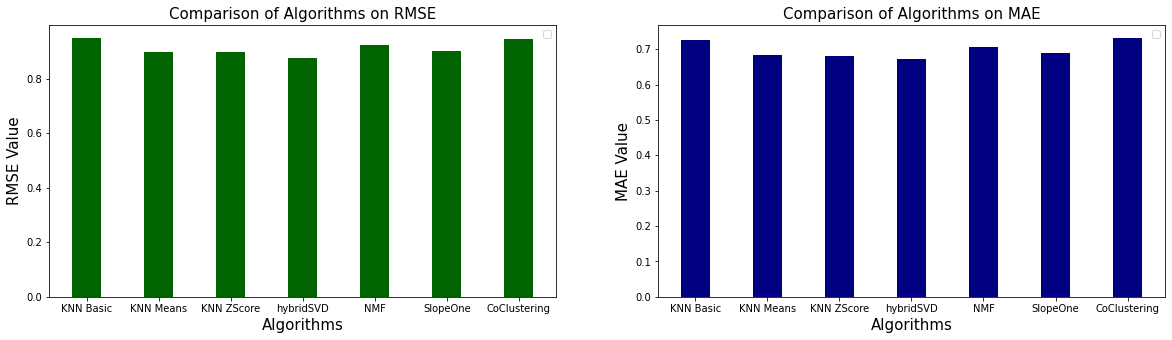

In [40]:
import matplotlib.pyplot as plt

x_algo = ['KNN Basic', 'KNN Means', 'KNN ZScore', 'hybridSVD',  'NMF', 'SlopeOne', 'CoClustering']
all_algos_cv = [cross_knnBasic, cross_knnMeans,cross_knnZ, cross_svd, cross_nmf, cross_slope, cross_coclus]

rmse_cv = [round(res['test_rmse'].mean(), 4) for res in all_algos_cv]
mae_cv = [round(res['test_mae'].mean(), 4) for res in all_algos_cv]

plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.title('Comparison of Algorithms on RMSE', loc='center', fontsize=15)
#plt.plot(x_algo, rmse_cv, label='RMSE', color='darkgreen', marker='o')
plt.bar(x_algo, rmse_cv, color ='darkgreen', width = 0.4)
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('RMSE Value', fontsize=15)
plt.legend()
#plt.grid(ls='dashed')

plt.subplot(1, 2, 2)
plt.title('Comparison of Algorithms on MAE', loc='center', fontsize=15)
#plt.plot(x_algo, mae_cv, label='MAE', color='navy', marker='o')
plt.bar(x_algo, mae_cv, color ='navy',width = 0.4)
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('MAE Value', fontsize=15)
plt.legend()
#plt.grid(ls='dashed')

plt.show()